In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})

import seaborn as sns

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')

Проверяем, что таблица нормально считалась

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Смотрим заполненность таблицы и информацию о типах данных полей

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Удаляем за необходимостью категориальные признаки с пропущенными значениями: *last_review* и *host_name*, и заполняем нулями nan значения поля *reviews_per_month*.
*Nan* значения поля *name* оставим без изменений

In [6]:
data.drop(columns=['last_review','host_name'], inplace=True)
data.reviews_per_month.fillna(0, inplace=True)

# Часть 1. Найдите ответы

1. Сколько записей в базе?

In [7]:

data.shape[0]

48895

2. Какие типы жилья и районы присутствуют в базе?

Типы жилья:

In [8]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Районы:

In [10]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

3. Вычислите набор статистических значений цены для каждого типа жилья.

In [11]:
data.groupby(['room_type']).price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


Есть ли какие-то особенности?

- Минимальная цена для каждого типа жилья равна нулю.
- 75-ый процентиль соответсвует ценам (229, 95, 75), при максимальных ценах
(10000, 10000, 1800).
- В целом, наблюдаются выбросы в минимальных и максимальных ценах, поэтому
можно брать наблюдения с ценами в диапазоне [.05, .95] перцентиль, либо
[Q1-1.5*IQR, Q3+1.5*IQR].

Жилья какого типа больше всего, как соотносятся цены?

- Больше всего целых квартир/домов.
- Цены на цельные квартиры/дома  более чем в два раза больше в среднем (и по медиане), 
    чем цены на общую комнату или личную комнату, цена на личную комнату 
    приблизительно в полтора раза (по медиане) выше цена на общую комнату.

4. Вычислите набор статистических значений цены для каждого района.

In [12]:
data.groupby(['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Какие особенности видите?
- Минимальная цена в *Bronx, Brooklyn, Manhattan* ноль, в остальных районах минимальная
цена также существенно ниже 25% перцентиля, что может соответсвовать выбросам.
- Аналогичная ситуация с максимальной ценой.
- Цены на жильё в *Manhattan* в полтора раза выше, чем в *Brooklyn*, и в более чем 2
раза выше, чем остальных районах.
- Наибольшее кол-во объявлений соответсвует районам *Brooklyn* и *Manhattan*, наименьшее
кол-во объявлений - *Staten Island*


5. Какова средняя стоимость жилья в зависимости от типа жилья и района?

In [13]:
data.pivot_table(index='neighbourhood_group', columns='room_type',
                 values='price', aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Какие особенности видите?

- *Manhattan* является в среднем самим дорогим районом вне зависимости от типа жилья
- Самые дешевые в среднем целые квартиры/дома находятся в *Bronx*,
самые дешевые в среднем комнаты - в *Staten Island*,
самые дешевые в среднем общие комнаты - в *Brooklyn*

6. Каково максимальное значение минимального количества ночей?

In [14]:
data.minimum_nights.max()

1250

 Как вы думаете, какое максимальное значение минимального количества ночей стоит считать адекватным?
- В качестве максимального значения можно взять 95% перцентиль, либо значение, соответствующее "концу усов"
графика boxplot, то есть значение, вычисляемое, как Q3+1.5*IQR = Q3+1.5*(Q3-Q1)

Значение по 95% перцентилю:

In [15]:
data.minimum_nights.quantile(.95)

30.0

Значение по верхней границе усов:

In [16]:
Q3_min_nights = data.minimum_nights.quantile(.75)
Q1_min_nights = data.minimum_nights.quantile(.25)
Q3_min_nights+1.5*(Q3_min_nights-Q1_min_nights)

11.0

Если подходить к выбору максимального значения минимального количества ночей с аналитической точки
зрения,то можно предположить, что максимальное количество ночей будет соответствовать жилью, сдаваемому на
долгий срок,а не посуточное жильё, рассчитанное на туристов или людей в командировке,
тогда логичным кажется значение ночей, соответствующее одному месяцу, то есть 30-31 дней, получившееся
значение совпадает с рассчитанным 95% процентилям, так что возьмём это число.

7. Каковы минимальная (0 не считается!), максимальная и средняя цена аренды жилья в
трёх самых дорогих соседствах Бруклина?

Сделаю двумя способами, в первом отфильтрую объявления по цене для каждого соседства по [.05, .95] процентилям,
чтоб убрать выбросы в ценах, во втором ничего фильтровать не буду.

In [38]:
Q05_price = data.price.quantile(.05)
Q95_price = data.price.quantile(.95)
print(Q05_price)
print(Q95_price)

40.0
355.0


In [39]:
data[(data.neighbourhood_group=='Brooklyn')&(data.price <= Q95_price)&(data.price>=Q05_price)]. \
            groupby(['neighbourhood']). \
            agg({'price': [np.mean, np.min, np.max]}). \
            sort_values(by=('price','mean'), ascending=False)[:3]

price          
                     mean amin amax
neighbourhood                      
DUMBO          185.058824   74  350
Mill Basin     179.750000   85  299
Vinegar Hill   169.968750   46  350

Без фильтрации:

In [24]:
data[(data.neighbourhood_group=='Brooklyn')].groupby(['neighbourhood']). \
            agg({'price': [np.mean, np.min, np.max]}). \
            sort_values(by=('price','mean'), ascending=False)[:3]

price           
                        mean amin  amax
neighbourhood                          
Sea Gate          487.857143   71  1485
Cobble Hill       211.929293   59  1750
Brooklyn Heights  209.064935   45  1500

Видим, что средние значения и максимальные значения поменялись в зависимости от того, фильтровались ли данные перед ранжированием. С одной стороны, 95-ый процентиль - это довольно мягкая граница, поэтому изменения в ранжировании говорят о наличии сильных выбросов в данных, с другой, не исключено, что в соседствах сдавались квартиры/дома/комнаты премиумного класса с запредельными ценами.

8. Составьте рейтинг слов из названий по популярности (частоте появления) и укажите 25 самых
популярных с числом их появлений.

Считываем все слова в список *names_count*, предварительно беря нижний регистр, чтобы избежать повторов

In [40]:
names=[]
for name in data.name:
    names.append(name)

names_count=[]
for x in names:
    for word in str(x).split():
        word=word.lower()
        names_count.append(word)

Формируем коллекция с частотами слов, сортируем по убыванию частоты, берем первые 25 значений.

In [41]:
from collections import Counter

top_25_w=Counter(names_count).most_common()
top_25_w=top_25_w[0:25]

Оборачиваем коллекцию в *pd.DataFrame*, переименовываем лэйблы столбцов, строим barplot

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

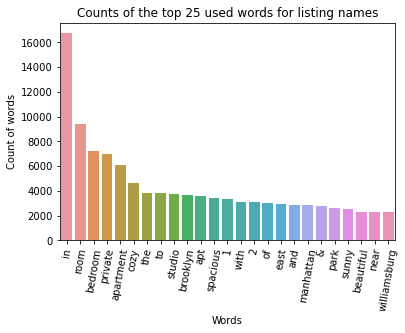

In [42]:
top_w=pd.DataFrame(top_25_w)
top_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
ax=sns.barplot(x='Words', y='Count', data=top_w)
ax.set_title('Counts of the top 25 used words for listing names')
ax.set_ylabel('Count of words')
ax.set_xlabel('Words')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

Не уверена, что вам пригодится эта информация, но особые энтузиасты могут сделать из полученных слов красивый вдохновляющий
плакат с помощью библиотеки wordcloud. Не стесняйтесь потом его вставить в отчет!

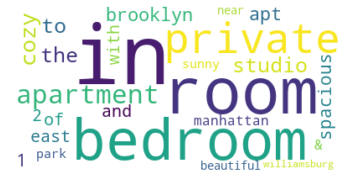

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(top_25_w))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Часть 2. Постройте диаграммы и графики

9. Постройте график, где по осям х и у будут широта и долгота, а цветом помечены районы.
Это задание дано, чтобы научиться строить такие графики, ну и красиво получается :)

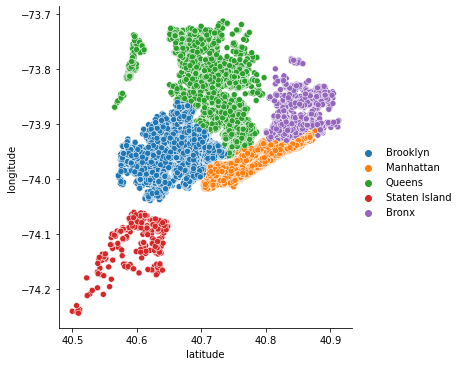

In [44]:
sns.relplot(x='latitude', y='longitude', hue=data.neighbourhood_group.to_list(), data=data)

Особые энтузиасты могут нарисовать маску плотности предложений на карте:

In [45]:
import folium
import sys
from folium.plugins import HeatMap
from IPython.core.display import display, HTML

m = folium.Map([40.7128, -74.0060], zoom_start=11)

HeatMap(data[['latitude','longitude']].dropna().astype('float64').to_numpy(), radius=8, gradient={0.2:'blue',0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)

display(m)

10. Постройте гистограммы всех признаков, для которых есть смысл это делать. Наверняка гистограмма id нам мало что даст.
Посмотрите, не присутствуют ли где-то выбросы.

Построим гистограммы численных признаков:

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

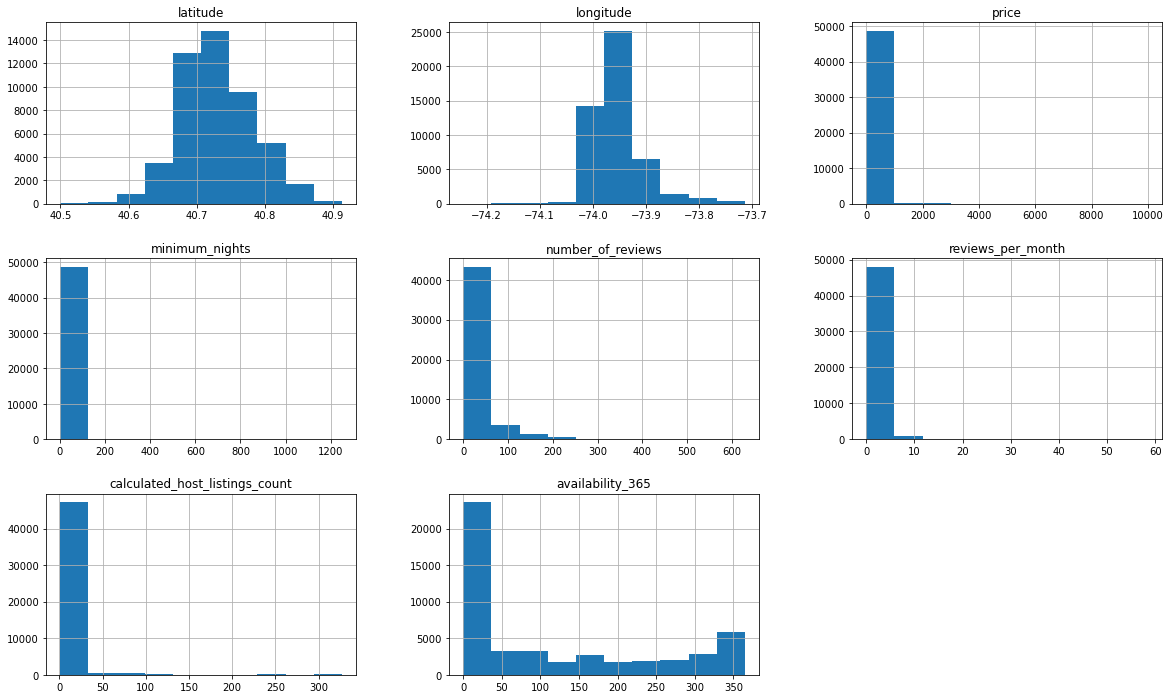

In [46]:
numeric_features = data.select_dtypes(include='number').drop(columns = ['id', 'host_id']).columns

data[numeric_features].hist(figsize=(20,12))

Можем заметить, что на всех гистрограммах, кроме гистограмм координат квартир и гистограммы доступности, присутствуют
сильные выбросы справа.
Гитсограмма доступности демонстрирует большое количество жилья, доступного менее месяца в году, что похоже на правду, также
можно обнаружить увеличение числа квартир справа на гистограмме, что соответствует жилью, несдаваемому в течении всего года.
Видимо, какая то часть квартир представляет из себя фиктивные объявления, которые висят на сайте постоянно.

Используя данные, полученные ранее, профильтруем таблицу, то есть возьмем объекты с минимальным количеством ночей меньше
30 дней и ценой, находящейся в диапазоне [.05, .95] перцентиль. Посмотрим на гистограммы после фильтрации.

In [47]:
filt_data = data[(data.minimum_nights <= 30)&
                (data.price > data.price.quantile(.05))&
                (data.price < data.price.quantile(.95))].copy()

Отфильтровали около 12% объявлений:

In [48]:
filt_data.shape[0]/data.shape[0]

0.8792105532263013

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

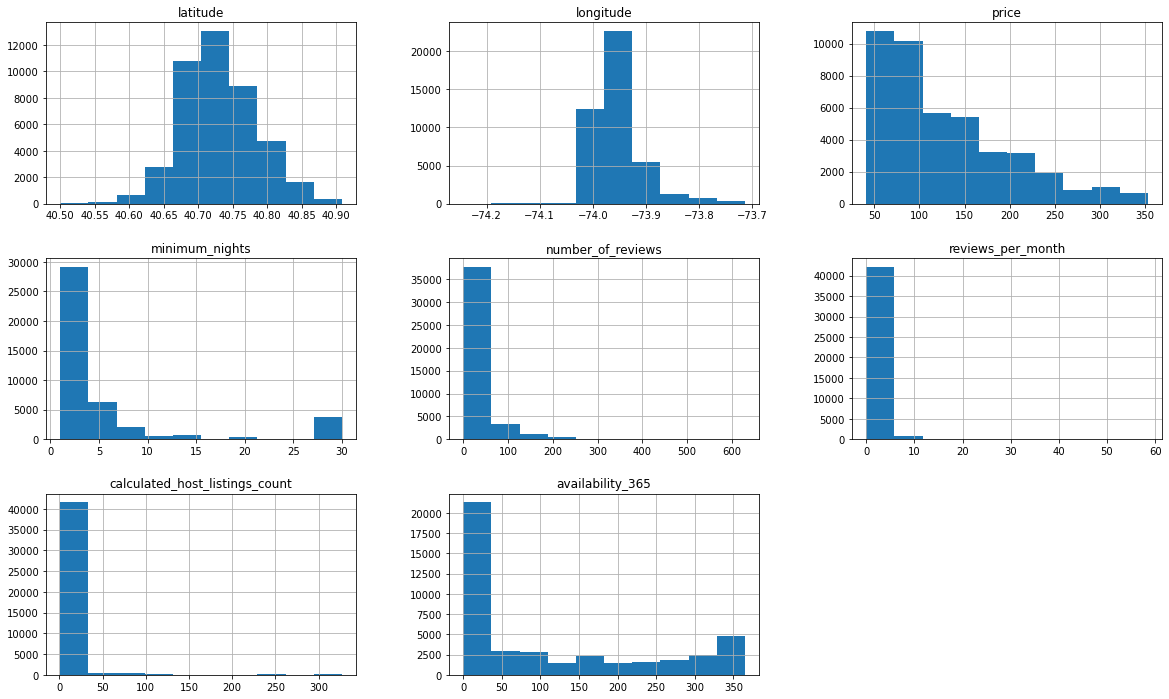

In [49]:
filt_data[numeric_features].hist(figsize=(20,12))

После фильтрации гистограмма цены напоминает логнормальное распределение, построим qq-plot от логарифма
величины, заметим, что концы распределения отклоняются от прямой, но в диапазоне -+2 сигмы распределение
совпадает с нормальным. Если требование нормальности распредления случайной величины является принципиальным
для дальнейшей обаботки данных, то можно отфильтровать значения по их значению по z-шкале.

((array([-4.15698587, -3.94962057, -3.83650372, ...,  3.83650372,
          3.94962057,  4.15698587]),
  array([3.73766962, 3.73766962, 3.73766962, ..., 5.86646806, 5.86646806,
         5.86929691])),
 (0.521547410513759, 4.720626553852013, 0.9878408477232113))

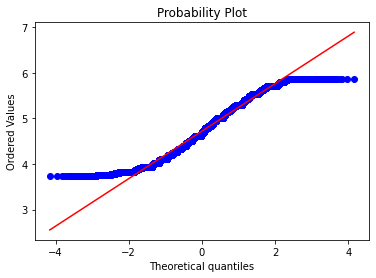

In [50]:
import scipy.stats as stats
import pylab
stats.probplot(np.log1p(filt_data.price), dist="norm", plot=pylab)

Text(0.5, 0, 'log(price+1)')

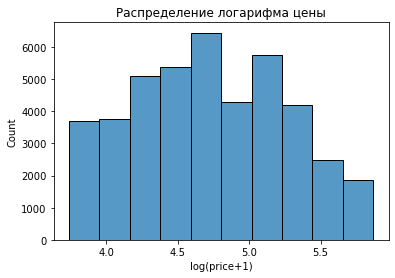

In [53]:
ax = sns.histplot(x=np.log1p(filt_data.price), bins=10)
ax.set_title('Распределение логарифма цены')
ax.xaxis.set_label_text('log(price+1)')

- На распределении минимальных ночей мы видим два пика: в районе нуля, что соответствует посуточной сдачи квартир
и в районе 30-ти дней, что соответствует долгосрочной сдачи;

- Распредления количества отзывов и отзывов за месяц имеют тяжелые хвосты справа, можно предположить, что небольшое
количество отзывов соответствует накрученным на объявления отзывам, тем не менее такие объявления можно считать валидными
для нашей выборки, так как накручивание отзывов также является одним из способов продвижения объявлений;

- Распределение числа единиц жилья на пользователя также имеет тяжелый хвост справа, что может соответствовать, например,
риелторским объявлениям, когда риелторская компания вывешивает на сайте объявления с одного аккаунта, опять таки, в
зависимости от поставленной задачи такие данные можно как и оставить, так и удалить;

- По гистограмме доступности жилья мы можем увидеть два пика, пик в районе 360 дней может соответствовать несдающемуся
жилью, причины несдачи жилья могут быть разные, но если предположить, что жильё не сдается по причине завышенной цены, то
в задаче предсказания стоимости жилья эти данные могут вносить шум, но также эти данные могут быть полезны в задачи
анализа причин несдачи жилья, в зависимости от постановки задачи решается, отсавлять эти данные или нет.

11. Из названий получите три новых признака: длина названия в символах, число слов, число популярных слов (из пункта 8).

In [93]:
filt_data['len_name'] = filt_data['name'].map(lambda x: len(str(x)) if x is not np.nan else np.nan)

In [94]:
filt_data['nb_words'] = filt_data['name'].map(lambda x: len(str(x).split())if x is not np.nan else np.nan)

In [95]:
filt_data['nb_pop_words'] = filt_data['name'].map(lambda x: len(set(str(x).split())&(set(top_w.Words.to_list())))
                                                  if x is not np.nan else np.nan)

In [96]:
filt_data.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,len_name,nb_words,nb_pop_words
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,34.0,8.0,4.0
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0,3.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,35.0,6.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,31.0,5.0,1.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,48.0,7.0,1.0


In [97]:
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42989 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42989 non-null  int64  
 1   name                            42975 non-null  object 
 2   host_id                         42989 non-null  int64  
 3   neighbourhood_group             42989 non-null  object 
 4   neighbourhood                   42989 non-null  object 
 5   latitude                        42989 non-null  float64
 6   longitude                       42989 non-null  float64
 7   room_type                       42989 non-null  object 
 8   price                           42989 non-null  int64  
 9   minimum_nights                  42989 non-null  int64  
 10  number_of_reviews               42989 non-null  int64  
 11  reviews_per_month               42989 non-null  float64
 12  calculated_host_listings_count  

Удалим поле *name*, так как в нём далее необходимости не будет, потом заменим пропущенные значения для признаков, созданных на основе названия, на нулевые значения:

In [99]:
filt_data.drop(columns=['name'], inplace=True)
filt_data.fillna(0, inplace=True)

12. Возможно, нас не интересует конкретное значение цены. Возможно, нам важен лишь диапазон цен.
Преобразуйте цену из численного типа в категориальный (пока неважно, сколько будет категорий, возьмите что-то между 3 и 10).
Добавьте преобразованный вариант цены в таблицу, пусть это будет признак “price_group”. (презентация, слайд 18).
Постройте гистограмму price_group.

In [100]:
filt_data['price_group'] = pd.cut(filt_data.price, 8)

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '(40.688, 80.0]'),
 Text(1, 0, '(80.0, 119.0]'),
 Text(2, 0, '(119.0, 158.0]'),
 Text(3, 0, '(158.0, 197.0]'),
 Text(4, 0, '(197.0, 236.0]'),
 Text(5, 0, '(236.0, 275.0]'),
 Text(6, 0, '(275.0, 314.0]'),
 Text(7, 0, '(314.0, 353.0]')]

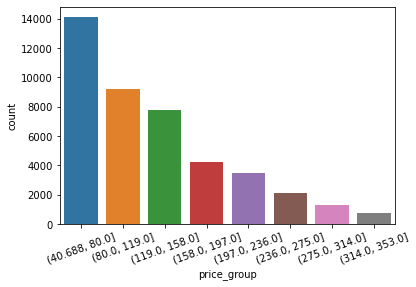

In [102]:
ax = sns.countplot(filt_data.price_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

13. Примените метод главных компонент, чтобы преобразовать вектор признаков в двумерный.
Приведите диаграмму рассеяния, в которой по осям будут получившиеся компоненты, а целевая переменная будет отмечена цветом.

Сформируем новый датасет из вектора признаков по заданию:

In [117]:
features = ['room_type', 'price', 'latitude',
            'minimum_nights', 'reviews_per_month',
            'calculated_host_listings_count', 'longitude',
            'len_name', 'nb_words', 'nb_pop_words']
feat_df = filt_data[features].copy()
feat_df.head()

,room_type,price,latitude,minimum_nights,reviews_per_month,calculated_host_listings_count,longitude,len_name,nb_words,nb_pop_words
0,Private room,149,40.64749,1,0.21,6,-73.97237,34.0,8.0,4.0
1,Entire home/apt,225,40.75362,1,0.38,2,-73.98377,21.0,3.0,0.0
2,Private room,150,40.80902,3,0.00,1,-73.94190,35.0,6.0,0.0
3,Entire home/apt,89,40.68514,1,4.64,1,-73.95976,31.0,5.0,1.0
4,Entire home/apt,80,40.79851,10,0.10,1,-73.94399,48.0,7.0,1.0


В данном датасете присутствует категориальный признак *room_type*, преобразуем его в
численный one-hot кодировкой:

In [118]:
feat_df = pd.get_dummies(feat_df)
feat_df.head()

,price,latitude,minimum_nights,reviews_per_month,calculated_host_listings_count,longitude,len_name,nb_words,nb_pop_words,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,40.64749,1,0.21,6,-73.97237,34.0,8.0,4.0,0,1,0
1,225,40.75362,1,0.38,2,-73.98377,21.0,3.0,0.0,1,0,0
2,150,40.80902,3,0.00,1,-73.94190,35.0,6.0,0.0,0,1,0
3,89,40.68514,1,4.64,1,-73.95976,31.0,5.0,1.0,1,0,0
4,80,40.79851,10,0.10,1,-73.94399,48.0,7.0,1.0,1,0,0


Возьмём *TruncatedSVD*, так как матрица принимает разреженный вид после one-hot кодировки, а данный класс метода главных компонент не центрирует данные перед сингулярным разложением.

In [119]:
from sklearn.decomposition import PCA, TruncatedSVD


pca = TruncatedSVD(n_components = 2)
pca.fit(feat_df)
data_reduced = pca.transform(feat_df)

In [109]:
svd_feat = pd.DataFrame(data_reduced, columns=['SVD_component_1', 'SVD_component_2'])
svd_feat.head()

,SVD_component_1,SVD_component_2
0,174.761816,-2.606069
1,236.893010,39.168991
2,175.562085,-3.233347
3,122.340831,-32.106683
4,118.471395,-42.660209


<AxesSubplot:xlabel='SVD_component_1', ylabel='SVD_component_2'>

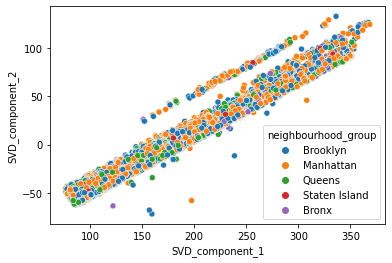

In [110]:
sns.scatterplot(x='SVD_component_1', y='SVD_component_2', hue=filt_data.neighbourhood_group,data=svd_feat)

Можем заметить, что компоненты коррелируют, плюс, никаких явных кластеров по районам не наблюдается, разве что основная доля дисперсии приходится на *Broolyn* и *Manhattan*.

14. Нормализуйте все признаки. Снова примените метод главных компонент и постройте диаграмму. Изменилось ли что-то?
Затем стандартизируйте исходные признаки, примените метод главных компонент и снова постройте диаграмму.

Нормализация:

Не будем брать для нормализации закодированные типы жилья:

In [ ]:
feat_norm_list = ['price', 'latitude',
                 'minimum_nights', 'reviews_per_month',
                 'calculated_host_listings_count', 'longitude',
                 'len_name', 'nb_words', 'nb_pop_words']

data_norm = feat_df.copy() 
data_norm[feat_norm_list] = (data_norm[feat_norm_list] - data_norm[feat_norm_list].min()) / \
                            (data_norm[feat_norm_list].max() - data_norm[feat_norm_list].min())


In [ ]:
pca.fit(data_norm)
data_norm_reduced = pca.transform(data_norm)
svd_norm_feat = pd.DataFrame(data_norm_reduced, columns=['SVD_component_1', 'SVD_component_2'])
sns.scatterplot(x='SVD_component_1', y='SVD_component_2', hue=filt_data.neighbourhood_group,data=svd_norm_feat)

Здесь также ничего интересного.

Стандартизация:

In [ ]:
data_stand = feat_df.copy()
data_stand[feat_norm_list] = (data_norm[feat_norm_list] - data_norm[feat_norm_list].mean())/data_norm[feat_norm_list].std()

In [ ]:
pca.fit(data_stand)
data_stand_reduced = pca.transform(data_stand)
svd_stand_feat = pd.DataFrame(data_stand_reduced, columns=['SVD_feat_1', 'SVD_feat_2'])
sns.scatterplot(x='SVD_feat_1', y='SVD_feat_2', hue=filt_data.neighbourhood_group,data=svd_stand_feat)

Также ничего особо интересного не наблюдаем, а исключением того, что нормализации количественных признаков помогла
нормализовать данные, потому что, как уже упоминалось ранее, TruncatedSVD этого не делает

15. Подумайте, могут ли какие-то признаки быть взаимозависимы? Если да, то какие (с учетом ваших преобразованных признаков)?
А после этого постройте матрицу корреляции, но, пожалуйста, с цветовой индикацией. Совпало с вашими догадками?

Можно было бы предположить, что количество популярных слов или длина заголовка объявления как то коррелирует с количеством отзывов или количеством объявлений на аккаунт, но парсинг слов происходил с учётом предлогов, артиклей и т.д., поэтому данные признаки вряд ли информативны и не окажут влияение на корреляцию. А так очевидно, что признаки заголовков будут между собой коррелировать и кол-во отзывов в месяц с общим количеством отзывов. 

In [ ]:
numeric_feat_list = filt_data.select_dtypes(include='number').drop(columns = ['id', 'host_id']).columns

f,ax=plt.subplots(figsize=(18,18))
corr_matrix = filt_data[numeric_feat_list].corr().abs()
sns.heatmap(corr_matrix, annot=True,linewidths=5, ax=ax)

In [127]:
# Часть 3. Формирование выборок

<AxesSubplot:xlabel='SVD_component_1', ylabel='SVD_component_2'>

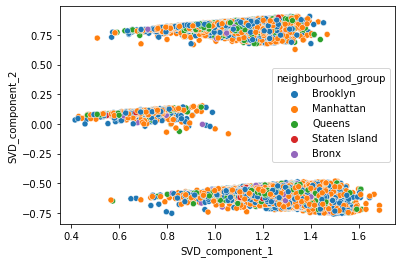

In [128]:
pca.fit(data_norm)
data_norm_reduced = pca.transform(data_norm)
svd_norm_feat = pd.DataFrame(data_norm_reduced, columns=['SVD_component_1', 'SVD_component_2'])
sns.scatterplot(x='SVD_component_1', y='SVD_component_2', hue=filt_data.neighbourhood_group,data=svd_norm_feat)

Здесь также ничего интересного.

Стандартизация:

In [129]:
data_stand = feat_df.copy()
data_stand[feat_norm_list] = (data_norm[feat_norm_list] - data_norm[feat_norm_list].mean())/data_norm[feat_norm_list].std()

<AxesSubplot:xlabel='SVD_feat_1', ylabel='SVD_feat_2'>

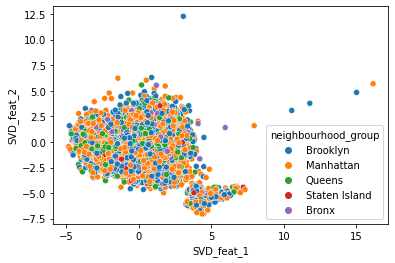

In [130]:
pca.fit(data_stand)
data_stand_reduced = pca.transform(data_stand)
svd_stand_feat = pd.DataFrame(data_stand_reduced, columns=['SVD_feat_1', 'SVD_feat_2'])
sns.scatterplot(x='SVD_feat_1', y='SVD_feat_2', hue=filt_data.neighbourhood_group,data=svd_stand_feat)

Также ничего особо интересного не наблюдаем, а исключением того, что нормализации количественных признаков помогла нормализовать данные, потому что, как уже упоминалось ранее, TruncatedSVD этого не делает

15. Подумайте, могут ли какие-то признаки быть взаимозависимы? Если да, то какие (с учетом ваших преобразованных признаков)?
А после этого постройте матрицу корреляции, но, пожалуйста, с цветовой индикацией. Совпало с вашими догадками?

Можно было бы предположить, что количество популярных слов или длина заголовка объявления как то коррелирует с количеством отзывов или количеством объявлений на аккаунт, но парсинг слов происходил с учётом предлогов, артиклей и т.д., поэтому данные признаки вряд ли информативны и не окажут влияение на корреляцию. А так очевидно, что признаки заголовков будут между собой коррелировать и кол-во отзывов в месяц с общим количеством отзывов. 

<AxesSubplot:>

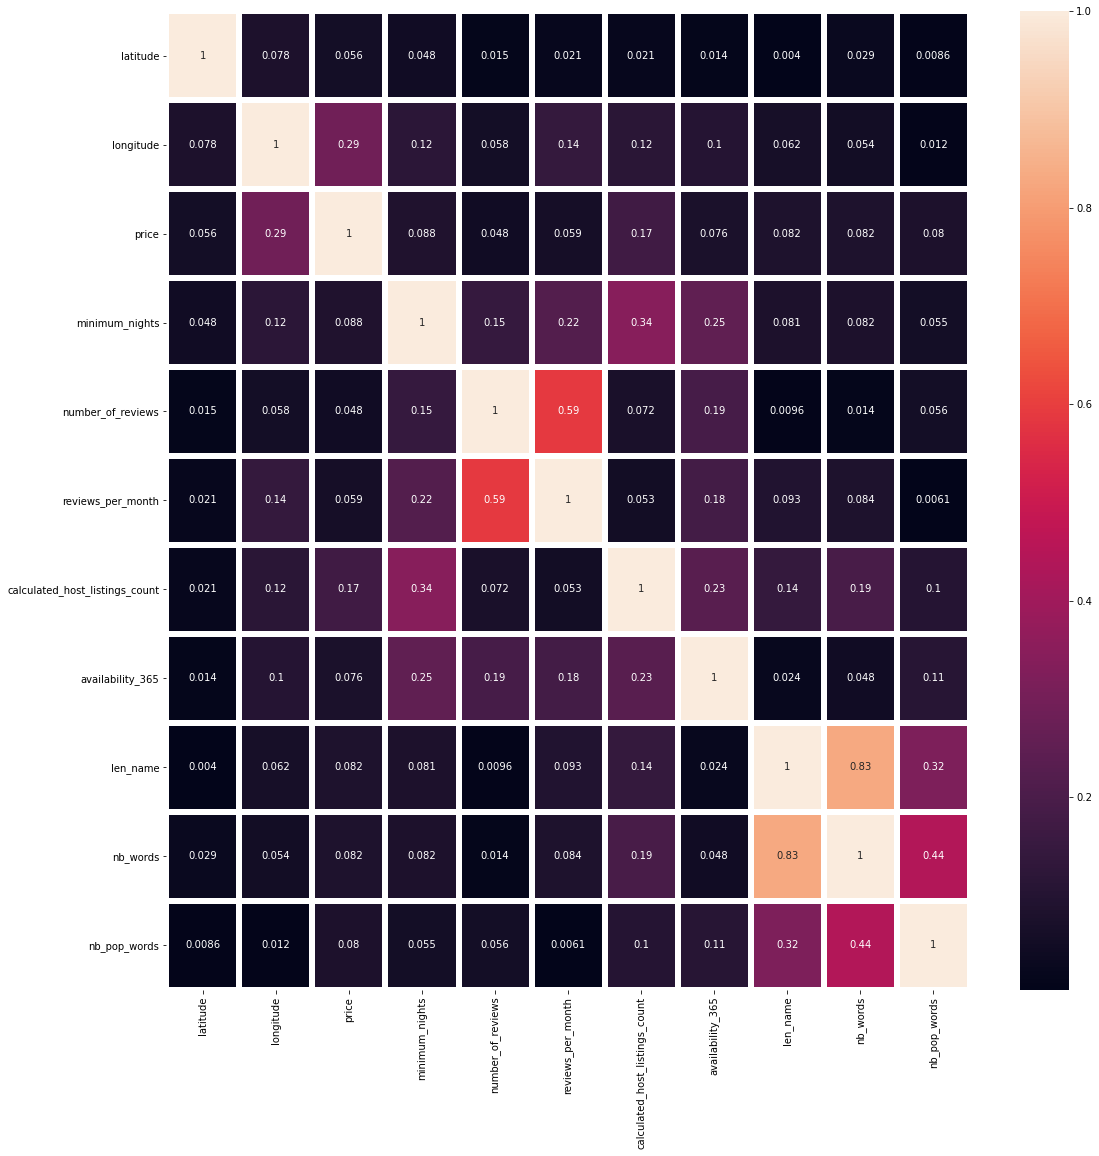

In [133]:
numeric_feat_list = filt_data.select_dtypes(include='number').drop(columns = ['id', 'host_id']).columns

f,ax=plt.subplots(figsize=(18,18))
corr_matrix = filt_data[numeric_feat_list].corr().abs()
sns.heatmap(corr_matrix, annot=True,linewidths=5, ax=ax)

# Часть 3. Формирование выборок

16. Выполните 3 разбиения для базы из п.13 (любой вариант - исходный, нормализованный, стандартизированный) c помощью
генератора разбиений KFold. Для каждого разбиения приведите гистограммы цен и районов.

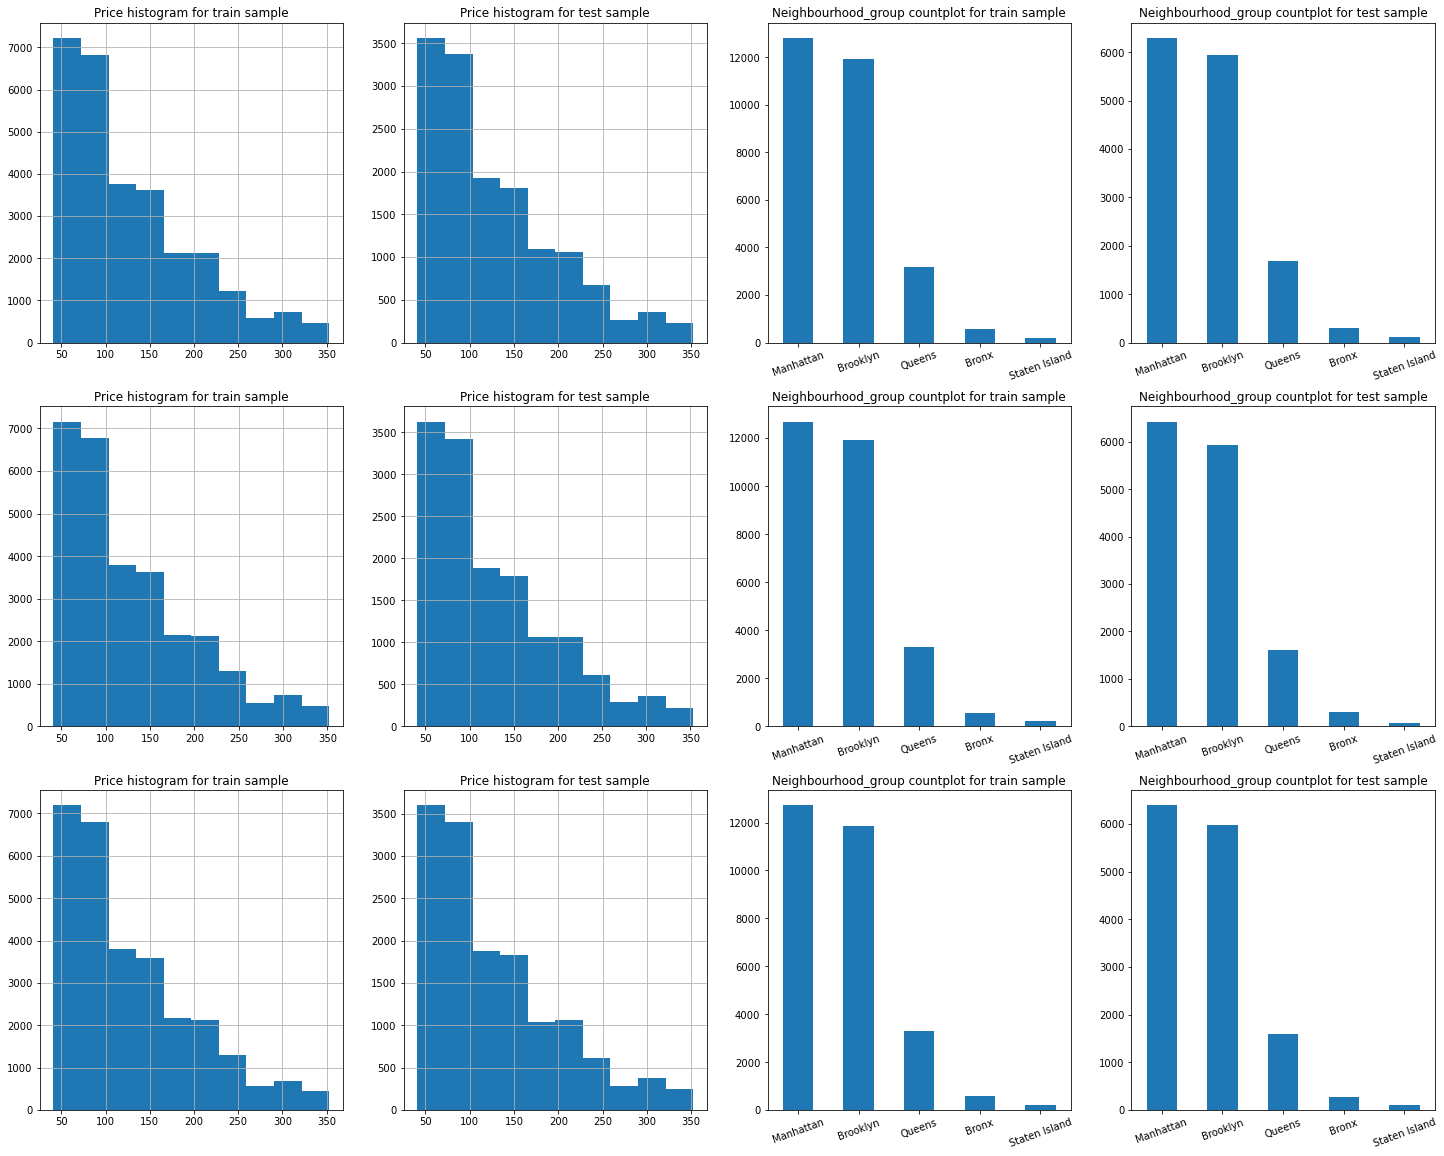

In [99]:
from sklearn.model_selection import KFold
_, axs = plt.subplots(3, 4, figsize=(25,20))

kf = KFold(n_splits=3, shuffle=True, random_state=42)
for ikf, (train_index, test_index) in enumerate(kf.split(filt_data)):

    filt_data.price.iloc[train_index].hist(ax=axs[ikf, 0])
    filt_data.price.iloc[test_index].hist(ax=axs[ikf, 1])
    filt_data.neighbourhood_group.iloc[train_index].value_counts().plot(kind="bar", ax=axs[ikf, 2])
    filt_data.neighbourhood_group.iloc[test_index].value_counts().plot(kind="bar", ax=axs[ikf, 3])

    axs[ikf, 0].set_title('Price histogram for train sample')
    axs[ikf, 1].set_title('Price histogram for test sample')
    axs[ikf, 2].set_title('Neighbourhood_group countplot for train sample')
    axs[ikf, 2].tick_params(axis='x', rotation=20)
    axs[ikf, 3].set_title('Neighbourhood_group countplot for test sample')
    axs[ikf, 3].tick_params(axis='x', rotation=20)